<a href="https://colab.research.google.com/github/ricardo-emanuel24/Ciencia-de-Dados/blob/main/atividade_4(Redes_Neurais).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão do crescimento de uma planta
Baseando em duas variáveis numéricas:
* Quantidade de luz recebida por dia (em horas)
* Volume de água fornecido por dia (em litros)

In [240]:
# Bibliotecas
import numpy as np
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score

# Regreesão Linear


In [241]:
# Definir os parâmetros do modelo
np.random.seed(42)  # Para resultados reprodutíveis
n_samples = 1000  # Número de amostras

# Variáveis preditoras (X1 e X2)
luz_horas = np.random.uniform(4, 12, n_samples)  # Luz recebida por dia (em horas)
agua_litros = np.random.uniform(0.5, 3, n_samples)  # Volume de água por dia (em litros)

# Gerar a variável resposta (crescimento em cm)
# Fórmula linear base + ruído
crescimento = 3 + 0.8 * luz_horas + 2.5 * agua_litros + np.random.normal(0, 1, n_samples)

# Criar DataFrame
data = pd.DataFrame({
    'Luz_horas': luz_horas,
    'Agua_litros': agua_litros,
    'Crescimento_cm': crescimento
})

# Visualizar as primeiras linhas do conjunto de dados


# Salvar os dados em um arquivo CSV (opcional)
data.to_csv('crescimento_plantas.csv', index=False)

O código acima gera um conjunto de dados sintéticos, com base em uma relação linear com ruído adicionado para simular variabilidade, no qual a variável resposta contínua (target) é crescimento da planta em centímentros

Os resultados são exibidos abaixo:

Os dados serão dividos em 70% para treino e 30% para teste, no qual o conjunto de teste será utilizado exclusivamento para a avaliação final.

* **Treino**: Para ajustar o modelo.
* **Teste**: Para avaliar a performance do modelo em dados desconhecidos.

In [242]:
# Dividir as variáveis preditoras (X) e a variável resposta (y)
X = data[['Luz_horas', 'Agua_litros']]  # Variáveis preditoras
y = data['Crescimento_cm']             # Variável resposta

# Divisão dos dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Conjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")

Conjunto de treino: 700 amostras
Conjunto de teste: 300 amostras


### Gráfico do crescimento da planta em função da quantidade de água e luz

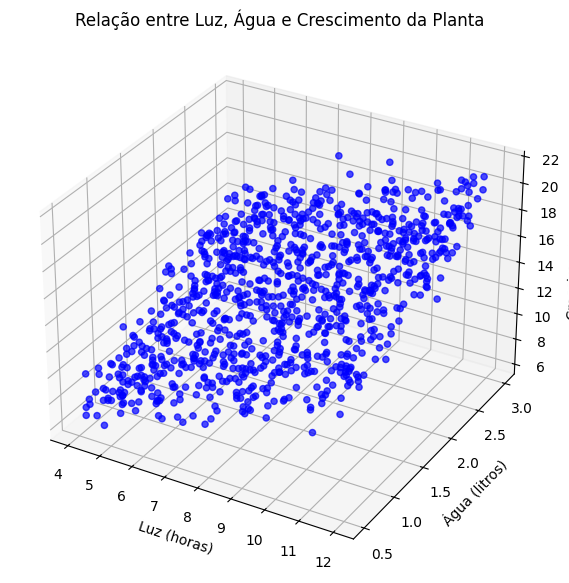

In [244]:
# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos
ax.scatter(luz_horas, agua_litros, crescimento, c='blue', marker='o', alpha=0.7)

# Rotular os eixos
ax.set_xlabel('Luz (horas)')
ax.set_ylabel('Água (litros)')
ax.set_zlabel('Crescimento (cm)')
ax.set_title('Relação entre Luz, Água e Crescimento da Planta')

# Mostrar o gráfico
plt.show()


### Treinamento do modelo de regressão linear
A equação que o modelo ajusta tem a forma:

`Crescimento_cm=(Coeficiente_1×Luz_horas)+(Coeficiente_2×Agua_litros)+Intercepto`

Após o treinamento, você pode usar esse modelo para fazer previsões no conjunto de teste.

In [256]:
# Instanciar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com o conjunto de treino
modelo.fit(X_train, y_train)

# Exibir os coeficientes do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [[0.80450818 2.49673873]]
Intercepto: [2.95761185]


## Avaliação do Modelo e Análise de Resíduos

Após o treinamento, é realizada uma avaliação do modelo no conjunto de teste, calculando métricas de desempenho e analisando os resíduos:

Erro absoluto médio (MAE): 0.76
Erro quadrático médio (MSE): 0.93
Raiz do erro quadrático médio (RMSE): 0.97
Coeficiente de determinação (R²): 0.87


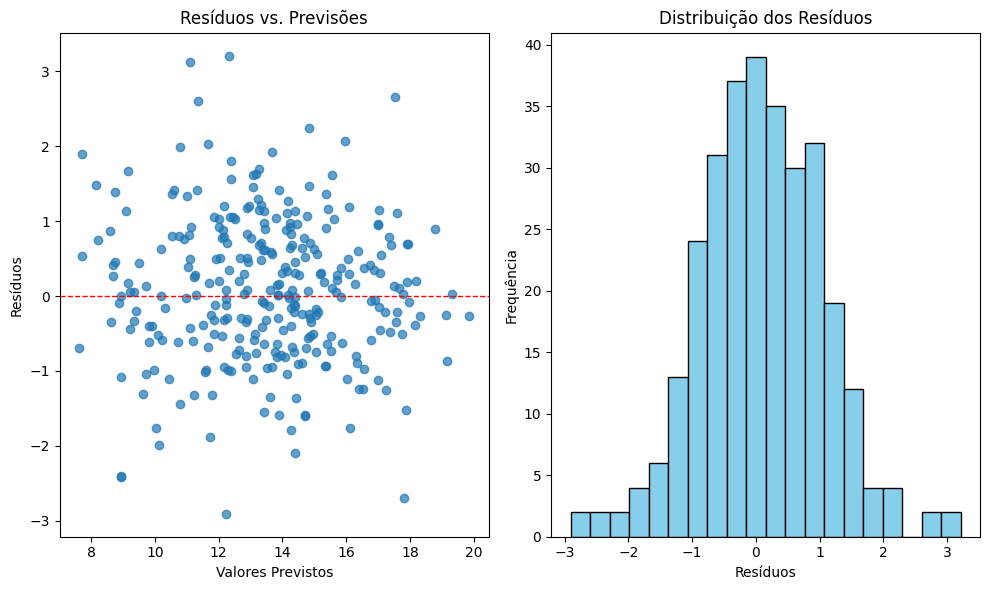

In [257]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)  # Erro absoluto médio
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
rmse = mse ** 0.5  # Raiz do erro quadrático médio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinação

# Exibir as métricas
print(f"Erro absoluto médio (MAE): {mae:.2f}")
print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

# Análise de resíduos
residuos = y_test - y_pred

# Plotar resíduos
plt.figure(figsize=(10, 6))

# Resíduos vs. Previsões
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Resíduos vs. Previsões")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")

# Histograma dos resíduos
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


1. Métricas calculadas:
* MAE: Mede o erro médio absoluto entre valores reais e previstos.
* MSE: Penaliza erros maiores, calculando o quadrado das diferenças.
* RMSE: É a raiz quadrada do MSE, mais intuitiva por estar na mesma escala da variável resposta.
* R²: Mede a proporção da variância explicada pelo modelo (próximo de 1 é melhor).
2. Análise de resíduos:

* Resíduos vs. Previsões: Mostra resíduos distribuídos aleatoriamente ao redor de zero (sem padrão claro).
* Histograma dos resíduos: Deve se aproximar de uma distribuição normal.

## Validação cruzada

A técnica de validação cruzada permite avaliar o desempenho do modelo de forma mais robusta, reduzindo a dependência de uma única divisão de treino e teste, pois é avaliado várias vezes com diferentes partes do conjunto de treinamento.

**Interpretação:**
* Se o RMSE da validação cruzada for próximo ao RMSE do conjunto de teste, o modelo generaliza bem.
* Diferenças significativas podem indicar overfitting ou underfitting.

In [258]:
# Aplicar validação cruzada com 5 folds no conjunto de treino
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular métricas da validação cruzada
cv_rmse = np.sqrt(-cv_scores)  # Convertendo para RMSE
cv_rmse_mean = np.mean(cv_rmse)  # Média do RMSE nos folds

# Exibir os resultados da validação cruzada
print(f"RMSE nos folds de validação cruzada: {cv_rmse}")
print(f"Média do RMSE na validação cruzada: {cv_rmse_mean:.2f}")

# Comparar com o conjunto de teste
print(f"RMSE no conjunto de teste: {rmse:.2f}")

RMSE nos folds de validação cruzada: [1.0874881  0.91038216 0.99365298 0.97559233 0.95739493]
Média do RMSE na validação cruzada: 0.98
RMSE no conjunto de teste: 0.97


# Redes Neurais

Reutilizando os dados alatórios gerados para treino e teste, foi utilizado o modelo de Redes Neurais, posteriormente será comparado com a Regressão Linear.

Está incluso:
* **Regularização L2**: Reduz o overfitting penalizando pesos excessivos.
* **Taxa de aprendizado decrescente**: Evita oscilações e melhora a convergência no final.

In [248]:
# Inicializar hiperparâmetros
input_size = 2
hidden_size1 = 10  # Mais neurônios na primeira camada escondida
hidden_size2 = 5  # Segunda camada escondida
output_size = 1
learning_rate = 0.01
l2_lambda = 0.001  # Regularização L2
epochs = 1000

# Inicializar pesos e biases
np.random.seed(42)
weights_input_hidden1 = np.random.randn(input_size, hidden_size1) * 0.1
bias_hidden1 = np.zeros(hidden_size1)

weights_hidden1_hidden2 = np.random.randn(hidden_size1, hidden_size2) * 0.1
bias_hidden2 = np.zeros(hidden_size2)

weights_hidden_output = np.random.randn(hidden_size2, output_size) * 0.1
bias_output = np.zeros(output_size)

# Forward e backward
def forward(x):
    global hidden1_input, hidden1_output, hidden2_input, hidden2_output, output_input, output
    hidden1_input = np.dot(x, weights_input_hidden1) + bias_hidden1
    hidden1_output = np.maximum(0, hidden1_input)

    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_output = np.maximum(0, hidden2_input)

    output_input = np.dot(hidden2_output, weights_hidden_output) + bias_output
    output = output_input  # Regressão não usa ativação final
    return output

def backward(x, y_true):
    global weights_input_hidden1, bias_hidden1, weights_hidden1_hidden2, bias_hidden2, weights_hidden_output, bias_output

    # Gradientes da camada de saída
    output_error = output - y_true
    output_gradient = output_error / y_true.shape[0]

    # Gradientes da segunda camada escondida
    hidden2_error = np.dot(output_gradient, weights_hidden_output.T)
    hidden2_gradient = hidden2_error * (hidden2_input > 0).astype(float)

    # Gradientes da primeira camada escondida
    hidden1_error = np.dot(hidden2_gradient, weights_hidden1_hidden2.T)
    hidden1_gradient = hidden1_error * (hidden1_input > 0).astype(float)

    # Atualização com regularização L2
    weights_hidden_output -= learning_rate * (np.dot(hidden2_output.T, output_gradient) + l2_lambda * weights_hidden_output)
    bias_output -= learning_rate * np.sum(output_gradient, axis=0)

    weights_hidden1_hidden2 -= learning_rate * (np.dot(hidden1_output.T, hidden2_gradient) + l2_lambda * weights_hidden1_hidden2)
    bias_hidden2 -= learning_rate * np.sum(hidden2_gradient, axis=0)

    weights_input_hidden1 -= learning_rate * (np.dot(x.T, hidden1_gradient) + l2_lambda * weights_input_hidden1)
    bias_hidden1 -= learning_rate * np.sum(hidden1_gradient, axis=0)

# Preparar os dados
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1, 1)

# Treinamento com decaimento do learning rate
for epoch in range(epochs):
    predictions = forward(X_train)
    backward(X_train, y_train)

    # Cálculo da perda
    loss = np.mean((y_train - predictions) ** 2)

    # Decaimento da taxa de aprendizado
    learning_rate *= 0.9995

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

# Gerar previsões (luz_horas_pred, agua_litros_pred, crescimento_pred)
luz_horas_pred = X_test[:, 0].tolist()
agua_litros_pred = X_test[:, 1].tolist()
crescimento_pred = forward(X_test).flatten().tolist()

# Salvar o modelo e previsões
modelo = {
    "weights_input_hidden1": weights_input_hidden1.tolist(),
    "bias_hidden1": bias_hidden1.tolist(),
    "weights_hidden1_hidden2": weights_hidden1_hidden2.tolist(),
    "bias_hidden2": bias_hidden2.tolist(),
    "weights_hidden_output": weights_hidden_output.tolist(),
    "bias_output": bias_output.tolist(),
    "luz_horas_pred": luz_horas_pred,
    "agua_litros_pred": agua_litros_pred,
    "crescimento_pred": crescimento_pred
}

with open('modelo.json', 'w') as f:
    json.dump(modelo, f, indent=4)

Epoch 100/1000, Loss: 27.7360
Epoch 200/1000, Loss: 11.6786
Epoch 300/1000, Loss: 5.5375
Epoch 400/1000, Loss: 2.8579
Epoch 500/1000, Loss: 1.5639
Epoch 600/1000, Loss: 1.1753
Epoch 700/1000, Loss: 1.1103
Epoch 800/1000, Loss: 1.0710
Epoch 900/1000, Loss: 1.0440
Epoch 1000/1000, Loss: 1.0249


## Comparando os valores reais com os preditos pelo modelo de Rede Neurais

Plotando os dados reais e preditos em um gráfico 3D, é possível analisar a eficiência do método. Neste caso, percebe-se que o modelo obteve valores próximos aos reais.

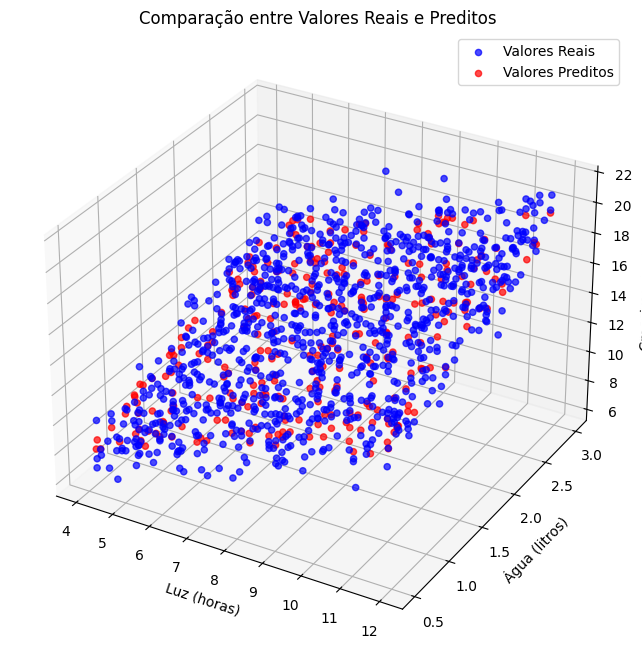

In [249]:
# Carregar dados preditos do modelo salvo no JSON
with open('modelo.json', 'r') as f:
    modelo_carregado = json.load(f)

# Valores preditos
luz_horas_pred = np.array(modelo_carregado['luz_horas_pred'])
agua_litros_pred = np.array(modelo_carregado['agua_litros_pred'])
crescimento_pred = np.array(modelo_carregado['crescimento_pred'])

# Criar o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar valores reais
data_real = ax.scatter(luz_horas, agua_litros, crescimento, c='blue', label='Valores Reais', alpha=0.7)

# Plotar valores preditos
data_pred = ax.scatter(luz_horas_pred, agua_litros_pred, crescimento_pred, c='red', label='Valores Preditos', alpha=0.7)

# Configurar o gráfico
ax.set_xlabel('Luz (horas)')
ax.set_ylabel('Água (litros)')
ax.set_zlabel('Crescimento (cm)')
ax.set_title('Comparação entre Valores Reais e Preditos')
ax.legend()

# Mostrar o gráfico
plt.show()

## Métricas de avaliação

In [252]:
# Carregar o modelo salvo
with open('modelo.json', 'r') as f:
    modelo = json.load(f)

# Previsões
crescimento_pred_treino = forward(X_train).flatten()
crescimento_pred_teste = forward(X_test).flatten()

# Métricas de avaliação - Treino
r2_treino = r2_score(y_train, crescimento_pred_treino)
rmse_treino = np.sqrt(mean_squared_error(y_train, crescimento_pred_treino))
mae_treino = mean_absolute_error(y_train, crescimento_pred_treino)

# Métricas de avaliação - Teste
r2_teste = r2_score(y_test, crescimento_pred_teste)
rmse_teste = np.sqrt(mean_squared_error(y_test, crescimento_pred_teste))
mae_teste = mean_absolute_error(y_test, crescimento_pred_teste)

# Exibir os resultados
print("Métricas de Desempenho do Modelo:\n")
print("Treino:")
print(f"R²: {r2_treino:.4f}")
print(f"RMSE: {rmse_treino:.4f}")
print(f"MAE: {mae_treino:.4f}")

print("\nTeste:")
print(f"R²: {r2_teste:.4f}")
#print(f"RMSE: {rmse_teste:.4f}")
print(f"MAE: {mae_teste:.4f}")


Métricas de Desempenho do Modelo:

Treino:
R²: 0.8753
RMSE: 1.0123
MAE: 0.8075

Teste:
R²: 0.8685
MAE: 0.7720


# Comparação dos Resultados


In [260]:
# Criando um DataFrame comparativo
data = {
    'Modelo': ['Regressão Linear', 'Redes Neurais'],
    'MAE': [mae, mae_teste],
    'R²': [r2, r2_teste],
    'RMSE': [rmse, rmse_teste]
}

df_comparativo = pd.DataFrame(data)

# Exibindo a tabela
print(df_comparativo.round(5))

             Modelo      MAE       R²     RMSE
0  Regressão Linear  0.75859  0.87137  0.96559
1     Redes Neurais  0.77196  0.86848  0.97638


Sendo assim, observa-se que a Rede Neural teve resultados ligeiramente piores (MAE, R², RMSE), embora próximos, a regressão linear se saiu um pouco melhor em termos de precisão e ajuste aos dados.

## Conclusão
Quando os dados seguem um padrão linear, a regressão linear é a escolha preferida, pois é eficiente, robusta e oferece melhor desempenho.
Redes neurais são mais indicadas para problemas onde há relações não-lineares complexas, desde que o tamanho e a qualidade dos dados sejam suficientes para justificar sua utilização.